In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install hazm

     |████████████████████████████████| 316 kB 5.2 MB/s 
     |████████████████████████████████| 1.4 MB 55.3 MB/s 
     |████████████████████████████████| 233 kB 46.4 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394489 sha256=897530f3a3c0bfb64b7c22f5b9dfba5941eb4921dfbfe1a8c30a8da89c1a81de
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=154500 sha256=0895c3aae87585871c19093732b154715664fe2dc99183a2f2c75aa0c3da166f
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


## Imports

In [5]:
import random
import json
import os
import numpy as np
from __future__ import unicode_literals
import hazm as hz
import codecs
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl 
from sklearn.feature_selection import chi2
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import matplotlib as mpl
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import seaborn as sb
import pickle

## Load Data

In [6]:
train_path=os.path.join(os.path.curdir,"train.json")
eval_path=os.path.join(os.path.curdir,"eval.json")
test_path=os.path.join(os.path.curdir,"test.json")

train_data = []
eval_data = []
test_data = []

train_data.extend(json.load(open(train_path,'r',encoding='utf-8')))
eval_data.extend(json.load(open(eval_path,'r',encoding='utf-8')))
test_data.extend(json.load(open(test_path,'r',encoding='utf-8')))

examples = random.sample(train_data,2)

for ex in examples:
    for x in ex.items():
        print(x[0], ": ", x[1])
    print("___")

title :  راهکار توسعه بازار سرمایه/ 82 درصد نقدینگی ورودی به بورس برای سفته بازی مصرف شد
abstract :  بیش از 112 هزار میلیارد تومان نقدینگی جدید از ابتدای سال جاری وارد بورس شده اند که کمتر از 20 هزار میلیارد تومان آن با عرضه های جدید و افزایش سرمایه شرکت ها جذب شد و بقیه نقدینگی برای افزایش قیمت سهام در بازار صرف شد.
text :  خبرگزاری فارس؛ از ابتدای سال جاری بازار سرمایه بیش از پیش مورد توجه عموم مردم قرار گرفت و پس از سال ها شرایطی ایجاد شد که نقدینگی خرد و پس انداز های مردمی راه به این بازار پیدا کند و وارد چرخه اقتصادی و تولیدی کشور شود.
آمارها نشان می دهد که بیش از 112 هزار میلیارد تومان نقدینگی جدید از ابتدای سال جاری وارد بورس شده اند که کمتر از 20 هزار میلیارد تومان آن با عرضه های جدید و افزایش سرمایه شرکت ها جذب شد و بقیه نقدینگی برای افزایش قیمت سهام در بازار صرف شد.
عدم مدیریت صحیح نقدینگی ورودی به بورس با عرضه سهام، تسریع در فرایند عرضه اولیه ها، ایجاد فضای تبلیغاتی نادرست از بورس به عنوان مکانی بدون ریسک ، آزادسازی سهام عدالت و ناتوانی سازمان بورس در مدیریت عرضه های شرکت ها

# Display Categories

In [7]:
train_categories=[item['category'] for item in train_data]
eval_categories=[item['category'] for item in eval_data]
test_categories=[item['category'] for item in test_data]

In [8]:
categories=np.unique(train_categories)
categories

array(['arts-media', 'culture', 'economy', 'politics', 'regional-offices',
       'scientific-academic', 'social', 'sports', 'world'], dtype='<U19')

In [9]:
traincat_news_count = dict.fromkeys(categories, 0)
for cat in train_categories:
  traincat_news_count[cat] += 1

for cat, cnt in traincat_news_count.items():
  print('Category "{}" contains {} news.'.format(cat, cnt))

Category "arts-media" contains 839 news.
Category "culture" contains 1663 news.
Category "economy" contains 2512 news.
Category "politics" contains 2487 news.
Category "regional-offices" contains 822 news.
Category "scientific-academic" contains 828 news.
Category "social" contains 2463 news.
Category "sports" contains 5017 news.
Category "world" contains 3369 news.


In [10]:
cat_counts = dict()
so = sorted(traincat_news_count.items(),key=lambda x: x[1] ,reverse=True)
big_categories = [x[0] for x in so[:10]]
print("top 10 categories: ",big_categories)
print("")
for x in so:
    print(x[0],": ",x[1])

top 10 categories:  ['sports', 'world', 'economy', 'politics', 'social', 'culture', 'arts-media', 'scientific-academic', 'regional-offices']

sports :  5017
world :  3369
economy :  2512
politics :  2487
social :  2463
culture :  1663
arts-media :  839
scientific-academic :  828
regional-offices :  822


## Example of news texts

In [ ]:
for ex in examples:
    print(ex['text'])
    print("_-"*100)

به گزارش خبرگزاری فارس، باشگاه ذوب آهن اصفهان نسبت به موضوع توافق با سرمربی جدید این تیم واکنش نشان داد.
روابط عمومی و اموربین الملل ذوب آهن اعلام کرد: باشگاه فرهنگی ورزشی ذوب آهن اصفهان تمامی موارد و مباحث مطرح شده در خصوص عقد قرارداد با مربیان مختلف  را کذب محض دانسته و اعلام قطعی سرمربی آینده تیم  ذوب آهن اصفهان در روز سه شنبه و طبق اعلام قبلی انجام خواهد شد. همه مباحث مطرح شده صرفا گمانه زنی رسانه‌ای است.
به گزارش فارس این در حالی است که گفته می‌شود مجتبی حسینی سرمربی نفت مسجد سلیمان با فسخ قرارداد خودش وارد مذاره با باشگاه اصفهانی شده است.
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
ابوالفضل عمویی سخنگوی کمیسیون امنیت ملی و سیاست خارجی مجلس شورای اسلامی در گفت‌وگو با خبرنگار گروه سیاسی خبرگزاری فارس، با اشاره به بیانات رهبر انقلاب در دیدار با مسئولین ستاد بزرگداشت شهید حاج قاسم سلیمانی و اشاره ایشان به ضرورت وحدت در کشور، اظها

# Preprocessing

In [11]:
normalizer = hz.Normalizer()
for x in train_data:
    x['title'] = normalizer.normalize(x['title'])
    x['text'] = normalizer.normalize(x['text'])
    x['abstract'] = normalizer.normalize(x['abstract'])
for x in eval_data:
    x['title'] = normalizer.normalize(x['title'])
    x['text'] = normalizer.normalize(x['text'])
    x['abstract'] = normalizer.normalize(x['abstract'])
for x in test_data:
    x['title'] = normalizer.normalize(x['title'])
    x['text'] = normalizer.normalize(x['text'])
    x['abstract'] = normalizer.normalize(x['abstract'])

In [12]:
stopwords = [normalizer.normalize(x.strip()) for x in codecs.open('stopwords.txt','r','utf-8').readlines()]
stopwords.extend(['(',')','»','«',':','،','.'])

In [13]:
data_bigcats = [x for x in train_data if x['category'] in big_categories]
print(data_bigcats[0])
print(len(data_bigcats))

{'title': 'چشم طمع دشمن با طنین\u200cانداز شدن نوای تفکر بسیجی کور می\u200cشود', 'abstract': 'رئیس شورای سیاستگذاری ائمه جمعه گفت: اگر در کشور، نوای دلنشین تفکر بسیجی طنین انداز شود، چشم طمع دشمنان و بدخواهان مردم و نظام اسلامی کور خواهد شد.', 'text': 'به گزارش خبرگزاری فارس، حجت الاسلام والمسلمین حاج علی اکبری رئیس شورای سیاستگذاری ائمه جمعه، در جلسه صبح امروز شورای معاونان و مدیران نهاد نماز جمعه که به صورت حضوری و مجازی برگزار شد، ضمن تبریک هفته بسیج به بسیجیان، فرماندهان بسیج و فرمانده عالی بسیجیان جهان اسلام و گرامیداشت یاد شهدای بسیجی گفت: بسیج، مکتبی\u200cترین و مردمی\u200cترین نیروی مقاومت جهان است که همیشه در نقطه نیاز اسلام و قرآن و انقلاب اسلامی حاضر است و خالصانه و بی ادعا، با روحیه جهادی به خدمت می\u200cپردازد و درخشش فرزندان برومند ملت در میدان مقابله با کرونا و حمایت معیشتی از نیازمندان در مقطع زمانی اخیر، به ویژه پس از عملیاتی سازی راهبرد محله محوری، نمونه موفق و جدید تجلی این ظرفیت خودانگیخته و خودجوش است. \nوی افزود: از بسیجیان غیور انتظار میرود بر اساس منویات رهبر حک

# Extracting Markers




In [14]:
rawtext = []
for x in data_bigcats:
    rawtext.append(x['text'])

def tokenizer(x):
    return [hz.Stemmer().stem(w) for w in hz.word_tokenize(x)]

def prep(inp):
    return hz.Normalizer().normalize(inp)


moving data to pandas dataframe and plotting category sizes

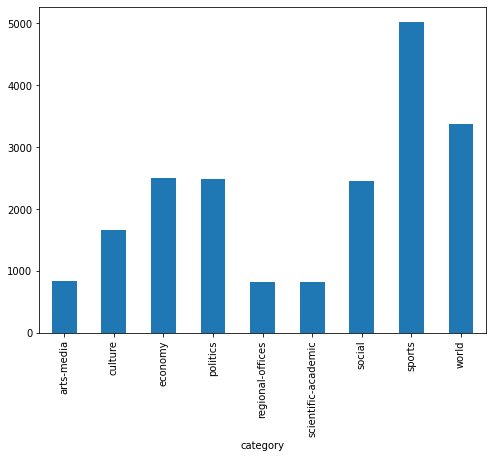

In [ ]:
df = pd.DataFrame()
df['text'] = [x['text'] for x in data_bigcats]
df['category'] = [x['category'] for x in data_bigcats]
df['title'] = [x['title'] for x in data_bigcats]
df['abstract'] = [x['abstract'] for x in data_bigcats]
df['category_id'] = df['category'].factorize()[0]
df['text_title']=df['text'] + ' '+ df['title']
df['text_abstract']=df['text'] + ' '+ df['abstract']
df['abstract_title']=df['abstract'] + ' '+ df['title']
df['text_title_abstract']=df['text'] + ' '+ df['title']+' '+df['abstract']
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)
df.head()
fig = plt.figure(figsize=(8,6))
df.groupby('category').text.count().plot.bar(ylim=0)
plt.show()


In [15]:
df_test = pd.DataFrame()
df_test['text'] = [x['text'] for x in test_data]
df_test['category'] = [x['category'] for x in test_data]
df_test['title'] = [x['title'] for x in test_data]
df_test['abstract'] = [x['abstract'] for x in test_data]
df_test['category_id'] = df_test['category'].factorize()[0]
df_test['text_title']=df_test['text'] + ' '+ df_test['title']
df_test['text_abstract']=df_test['text'] + ' '+ df_test['abstract']
df_test['abstract_title']=df_test['abstract'] + ' '+ df_test['title']
df_test['text_title_abstract']=df_test['text'] + ' '+ df_test['title']+' '+df_test['abstract']

# Markers

# Unigrams

Creating TFIDF vectorizer 
    using unigrams (minimum df = 3) 

In [ ]:
tfidf=skl.feature_extraction.text.TfidfVectorizer(
    stop_words=stopwords,
    # tokenizer=tokenizer,
    preprocessor = prep,
    ngram_range = (1,1),
    norm= 'l2',
    min_df = 3 ,
    sublinear_tf = True
)

features = tfidf.fit_transform(rawtext).toarray()

N = 2
labels = df.category_id

for category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  print("# '{}':".format(category))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))


# 'arts-media':
  . Most correlated unigrams:
       . سینمایی
       . فیلم
# 'culture':
  . Most correlated unigrams:
       . کتاب
       . قرآن
# 'economy':
  . Most correlated unigrams:
       . بازار
       . قیمت
# 'politics':
  . Most correlated unigrams:
       . پارلمانی
       . مجلس
# 'regional-offices':
  . Most correlated unigrams:
       . تاجیکستان
       . ازبکستان
# 'scientific-academic':
  . Most correlated unigrams:
       . علمی
       . دانشگاهی
# 'social':
  . Most correlated unigrams:
       . تهران
       . شهری
# 'sports':
  . Most correlated unigrams:
       . بازی
       . تیم
# 'world':
  . Most correlated unigrams:
       . آمریکا
       . الملل


Creating TFIDF vectorizer 
    using unigrams and bigrams (minimum df = 10) 

In [ ]:
tfidf=skl.feature_extraction.text.TfidfVectorizer(
    stop_words=stopwords,
    # tokenizer=tokenizer,
    preprocessor = prep,
    ngram_range = (1,2),
    norm= 'l2',
    min_df = 10 ,
    sublinear_tf = True
)
features = tfidf.fit_transform(rawtext).toarray()

In [ ]:

N = 2
labels = df.category_id

for category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(category))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))


# 'arts-media':
  . Most correlated unigrams:
       . سینمایی
       . فیلم
  . Most correlated bigrams:
       . رادیو تلویزیون
       . خبرنگار رادیو
# 'culture':
  . Most correlated unigrams:
       . کتاب
       . قرآن
  . Most correlated bigrams:
       . های دینی
       . قرآن فعالیت
# 'economy':
  . Most correlated unigrams:
       . بازار
       . قیمت
  . Most correlated bigrams:
       . اقتصادی خبرگزاری
       . خبرنگار اقتصادی
# 'politics':
  . Most correlated unigrams:
       . پارلمانی
       . مجلس
  . Most correlated bigrams:
       . پارلمانی خبرگزاری
       . مجلس شورای
# 'regional-offices':
  . Most correlated unigrams:
       . تاجیکستان
       . ازبکستان
  . Most correlated bigrams:
       . فارس دوشنبه
       . خبرنگار خبرگزاری
# 'scientific-academic':
  . Most correlated unigrams:
       . علمی
       . دانشگاهی
  . Most correlated bigrams:
       . علمی دانشگاهی
       . گروه علمی
# 'social':
  . Most correlated unigrams:
       . تهران
       . شهری
  . Most c

# Logistic Regression 

# Utils

In [ ]:
def collect_preds(Y_test,Y_preds):
    pred_gold_list=[[[Y_test[idx]],pred] for idx,pred in enumerate(Y_preds)]
    return pred_gold_list
             
def compute_accuracy(eval_items:list):
    correct=0
    total=0
    for item in eval_items:
        true_pred=item[0]
        machine_pred=set(item[1])
        
        for cat in true_pred:
            if cat in machine_pred:
                correct+=1
                break
    accuracy=correct/float(len(eval_items))
    return accuracy

In [ ]:
def extract_features(df,field,training_data,testing_data):

    tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95)
    tfidf_vectorizer.fit_transform(training_data[field].values)
        
    train_feature_set=tfidf_vectorizer.transform(training_data[field].values)
    test_feature_set=tfidf_vectorizer.transform(testing_data[field].values)
        
    return train_feature_set,test_feature_set,tfidf_vectorizer

def get_top_k_predictions(model,X_test,k):
    
    probs = model.predict_proba(X_test)
    best_n = np.argsort(probs, axis=1)[:,-k:]
    preds=[[model.classes_[predicted_cat] for predicted_cat in prediction] for prediction in best_n]
    preds=[ item[::-1] for item in preds]
    
    return preds
   
def save_model(model,transformer,model_path,transformer_path):

    with open(model_path, 'wb') as f:
        pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)
    with open(transformer_path, 'wb') as f:
        pickle.dump(transformer, f, pickle.HIGHEST_PROTOCOL)

def load_model(model_path,transformer_path):

    loaded_model = pickle.load(open(model_path, 'rb'))
    loaded_transformer = pickle.load(open(transformer_path, 'rb'))   

    return loaded_model,loaded_transformer   
    
def train_model(df,df_test,field="text",top_k=1):
    
    training_data=df
    testing_data = df_test
    Y_train=training_data['category'].values
    Y_test=testing_data['category'].values
    X_train,X_test,feature_transformer=extract_features(df,field,training_data,testing_data)

    scikit_log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=1000, penalty='l2',max_iter=1000)
    model=scikit_log_reg.fit(X_train,Y_train)

    model_path="../models/model.pkl"
    transformer_path="../models/transformer.pkl"
    save_model(model,feature_transformer,model_path,transformer_path)

    return model,feature_transformer

def test_model(model,field,testing_data,feature_transformer):
    Y_test=testing_data['category'].values
    X_test=feature_transformer.transform(testing_data[field].values)
    preds=get_top_k_predictions(model,X_test,top_k)

    eval_items=collect_preds(Y_test,preds)
    accuracy=compute_accuracy(eval_items)

    Y_test_n=np.zeros((len(preds)))
    pred_n=np.zeros((len(preds)))
    
    for i in range(len(preds)):
      for j in range(len(categories)):
        if Y_test[i]==categories[j]:
            Y_test_n[i]=j
        if preds[i][0]==categories[j]:
            pred_n[i]=j

    mpl.style.use('seaborn')
    num_classes=len(categories)
    conf_arr = np.zeros((num_classes, num_classes))
    for i in range(len(preds)):
            conf_arr[int(pred_n[i])][int(Y_test_n[i])] += 1
    summ = conf_arr.sum()
    df_cm = pd.DataFrame(conf_arr, 
      index = categories,
      columns = categories)
    fig = plt.figure()
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    cmap = sb.cubehelix_palette(light=1, as_cmap=True)
    res = sb.heatmap(df_cm, annot=True, vmin=0.0, vmax=np.max(conf_arr), fmt='.2f', cmap=cmap)
    res.invert_yaxis()
    plt.yticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5], categories ,va='center')
    plt.title('Confusion Matrix')
    plt.show()

    print("\nCLassification Report of Logistic Regression Classifier:\n")
    print(classification_report(Y_test, preds))

# Train the model

When we use title as feature we get 83% accuracy. On the other hand, using absract as feature increases the accuracy to 89%.Morover, text as feature gives the 95% accuracy.(using all of the features also gives us 95% accuracy)

In [ ]:
field='text_title_abstract'
top_k=1
model,transformer=train_model(df,df_test,field=field,top_k=top_k)

[LibLinear]

# Evaluate the model

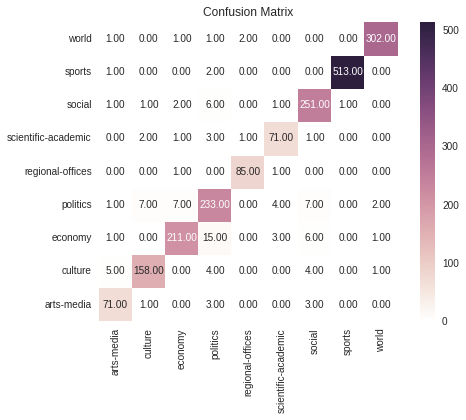


CLassification Report of Logistic Regression Classifier:

                     precision    recall  f1-score   support

         arts-media       0.91      0.88      0.89        81
            culture       0.92      0.93      0.93       169
            economy       0.89      0.95      0.92       223
           politics       0.89      0.87      0.88       267
   regional-offices       0.98      0.97      0.97        88
scientific-academic       0.90      0.89      0.89        80
             social       0.95      0.92      0.94       272
             sports       0.99      1.00      1.00       514
              world       0.98      0.99      0.99       306

           accuracy                           0.95      2000
          macro avg       0.94      0.93      0.93      2000
       weighted avg       0.95      0.95      0.95      2000



In [ ]:
test_model(model,field,df_test,transformer)

#Use Loaded Model

In [ ]:
model_path="../models/model.pkl"
transformer_path="../models/transformer.pkl"
loaded_model,loaded_transformer = load_model(model_path,transformer_path)
test_features=loaded_transformer.transform(["ورزش"])
get_top_k_predictions(loaded_model,test_features,2)

[['sports', 'social']]